#Series de taylor

En este post, revisaremos cómo crear una Serie Taylor con Python y para los bucles. Luego refactorizaremos la Serie Taylor en funciones y compararemos la salida de nuestras funciones de la Serie Taylor con las funciones de la Biblioteca Estándar de Python.  
Una serie de Taylor es una serie infinita de términos matemáticos que al sumarlos se aproximan a una función matemática. Una serie de Taylor puede ser usada para aproximar $e^{x}$ y coseno.  
Un ejemplo de una serie de Taylor que se aproxima a $e^{x}$ es el siguiente.  


$e^{x}\approx \sum_{n=0}^{\infty}\frac{x^{n}}{n!}\approx 1+x+\frac{x^{2}}{2!}+\frac{x^{3}}{3!}+\frac{x^{4}}{4!}+...$  
Podemos ver que cada término de la expansión de la Serie Taylor depende del lugar que ocupa ese término en la serie. A continuación se muestra un gráfico que muestra cada término de la Serie de Taylor en una fila. Las columnas de la tabla representan el índice de términos, el término matemático y, cómo codificar ese término en Python. Nótese que la función factorial() es parte del módulo matemático de la Biblioteca Estándar de Python.  
Podemos combinar estos términos en una línea de código Python para estimar $e^{2}$. El código de abajo calcula la suma de los primeros cinco términos de la expansión de la Serie Taylor de $e^{x}$, donde x=2. Nótese que el módulo matemático necesita ser importado antes de que se pueda usar math.factorial().  





In [1]:
import math

x = 2
e_to_2 = x**0/math.factorial(0) + x**1/math.factorial(1) + x**2/math.factorial(2) + x**3/math.factorial(3) + x**4/math.factorial(4)
print(e_to_2)

7.0


Nuestra aproximación de la Serie Taylor de $e^{2}$ fue calculada como 7.0. Comparemos nuestra aproximación de la Serie Taylor con la función math.exp() de Python. La función math.exp() de Python eleva e a cualquier potencia. En nuestro caso, queremos usar math.exp(2) porque queremos calcular  $e^{2}$.

In [2]:
print(math.exp(2))

7.38905609893065


Nuestra aproximación de la serie Taylor 7.0 no está tan lejos del valor calculado 7.389056... ...usando la función exp() de Python.

##Usando bucles

In [3]:
import math

x = 2
e_to_2 = 0
for i in range(5):
    e_to_2 += x**i/math.factorial(i)
    
print(e_to_2)

7.0


El resultado 7.0 es el mismo que calculamos cuando escribimos cada término de la Serie Taylor individualmente.  
Una ventaja de usar un bucle de for es que podemos aumentar fácilmente el número de términos. Si aumentamos el número de veces que se ejecuta el bucle for, aumentamos el número de términos en la expansión de la Serie Taylor. Probemos con 10 términos. Observa cómo la línea para i en range(10): ahora incluye 10 pasados a la función range().  


In [4]:
import math

x = 2
e_to_2 = 0
for i in range(10):
    e_to_2 += x**i/math.factorial(i)
    
print(e_to_2)

7.3887125220458545


Es un valor casi aproximado a lo que nos dios con la funcion exp()

In [5]:
print(math.exp(2))

7.38905609893065


##Ahora en una funcion

In [6]:
import math

def func_e_to_2(n):
    x = 2
    e_to_2 = 0
    for i in range(n):
        e_to_2 += x**i/math.factorial(i)
    
    return e_to_2

In [7]:
out = func_e_to_2(10)
print(out)

7.3887125220458545


La misma funcion pero ahora agregando otro argumento el cual va ser el numero el numero x al cual se va a elevar la funcion.  

In [8]:
import math

def func_e(x, n):
    e_approx = 0
    for i in range(n):
        e_approx += x**i/math.factorial(i)
    
    return e_approx

In [9]:
out = func_e(2,10)
print(out)

7.3887125220458545


$e^{5}$

In [10]:
out = func_e(5,10)
print(out)

143.68945656966488


Usando la funcion exp()

In [11]:
out = math.exp(5)
print(out)

148.4131591025766


Ahora usemos un bucle for para calcular la diferencia entre la expansión de la Serie Taylor, calculada por nuestra función func_e(), comparada con la función exp() de Python. Vamos a calcular la diferencia entre las dos funciones cuando usamos entre 1 y 10 términos en la expansión de la serie de Taylor.  

In [12]:
import math

x = 5
for i in range(1,11):
    e_approx = func_e(x,i)
    e_exp = math.exp(x)
    e_error = abs(e_approx - e_exp)
    print(f'{i} terms: Taylor Series approx= {e_approx}, exp calc= {e_exp}, error = {e_error}')

1 terms: Taylor Series approx= 1.0, exp calc= 148.4131591025766, error = 147.4131591025766
2 terms: Taylor Series approx= 6.0, exp calc= 148.4131591025766, error = 142.4131591025766
3 terms: Taylor Series approx= 18.5, exp calc= 148.4131591025766, error = 129.9131591025766
4 terms: Taylor Series approx= 39.33333333333333, exp calc= 148.4131591025766, error = 109.07982576924327
5 terms: Taylor Series approx= 65.375, exp calc= 148.4131591025766, error = 83.0381591025766
6 terms: Taylor Series approx= 91.41666666666667, exp calc= 148.4131591025766, error = 56.99649243590993
7 terms: Taylor Series approx= 113.11805555555556, exp calc= 148.4131591025766, error = 35.29510354702104
8 terms: Taylor Series approx= 128.61904761904762, exp calc= 148.4131591025766, error = 19.79411148352898
9 terms: Taylor Series approx= 138.30716765873015, exp calc= 148.4131591025766, error = 10.105991443846449
10 terms: Taylor Series approx= 143.68945656966488, exp calc= 148.4131591025766, error = 4.723702532911

Fíjate en cómo el error disminuye a medida que añadimos términos a la Serie Taylor. Cuando la Serie Taylor sólo tiene un término, el error es 147.41.... Cuando se usan 10 términos en la Serie Taylor, el error baja a 4.7237....  
¿Cuántos términos se necesitarían para producir un error de menos de 1? Podemos usar una sentencia de ruptura para salir del bucle for cuando el error es menor que 1. El código de abajo calcula cuántos términos se necesitan en la Serie Taylor, cuando se calcula e5, para mantener el error menor que 1.

In [13]:
import math

x = 5
for i in range(1,20):
    e_approx = func_e(x,i)
    e_exp = math.exp(x)
    e_error = abs(e_approx - e_exp)
    if e_error < 1:
        break
        
print(f'{i} terms: Taylor Series approx= {e_approx}, exp calc= {e_exp}, error = {e_error}')

12 terms: Taylor Series approx= 147.60384850489015, exp calc= 148.4131591025766, error = 0.8093105976864479


##Crear una función para estimar el valor de cos(x) usando una serie de Taylor
A continuación, vamos a calcular el valor de la función del coseno utilizando una serie de Taylor. La expansión de la serie de Taylor para cos(x) es la siguiente.  
$cos(x)\approx \sum_{n=0}^{\infty}(-1)^{n}\frac{x^{2n}}{2n!}\approx 1-\frac{x^{2}}{2!}+\frac{x^{4}}{4!}-\frac{x^{6}}{6!}+...$  


In [14]:
import math

def func_cos(x, n):
    cos_approx = 0
    for i in range(n):
        coef = (-1)**i
        num = x**(2*i)
        denom = math.factorial(2*i)
        cos_approx += ( coef ) * ( (num)/(denom) )
    
    return cos_approx

Usemos nuestra función func_cos() para estimar el coseno de 45 grados. Obsérvese que la función func_cos() calcula el coseno de un ángulo en radianes. Si queremos calcular el coseno de 45 grados usando nuestra función, primero tenemos que convertir 45 grados en radianes. Por suerte, el módulo matemático de Python tiene una función llamada radianes() que hace la conversión del ángulo temprano.

In [15]:
angle_rad = (math.radians(45))
out = func_cos(angle_rad,5)
print(out)

0.7071068056832942


Usando nuestra función func_cos() y 5 términos en la aproximación de la Serie Taylor, estimamos que el coseno de 45 grados es 0.707106805.... Comprobemos nuestra función func_cos() comparada con la función cos() de Python del módulo matemático.

In [16]:
out = math.cos(angle_rad)
print(out)

0.7071067811865476


##Construye una gráfica para comparar la aproximación de la Serie Taylor con la función cos() de Python  
En la última parte de este post, vamos a construir una gráfica que muestra cómo la aproximación de la Serie Taylor calculada por nuestra función func_cos() se compara con la función cos() de Python.

La idea es hacer un gráfico que tenga una línea para la función cos() de Python y líneas para la aproximación de la serie de Taylor basada en diferentes números de términos.

Por ejemplo, si usamos 3 términos en la aproximación de la serie de Taylor, nuestro gráfico tiene dos líneas. Una recta para la función cos() de Python y una recta para nuestra función func_cos() con tres términos en la aproximación de la serie de Taylor. Calcularemos el coseno usando ambas funciones para los ángulos entre -2π radianes y 2π radianes.


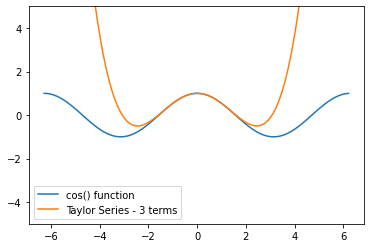

In [18]:
import math
import numpy as np
import matplotlib.pyplot as plt
# if using a Jupyter notebook, include:
%matplotlib inline

angles = np.arange(-2*np.pi,2*np.pi,0.1)
p_cos = np.cos(angles)
t_cos = [func_cos(angle,3) for angle in angles]

fig, ax = plt.subplots()
ax.plot(angles,p_cos)
ax.plot(angles,t_cos)
ax.set_ylim([-5,5])
ax.legend(['cos() function','Taylor Series - 3 terms'])

plt.show()

##Usando bucle for:


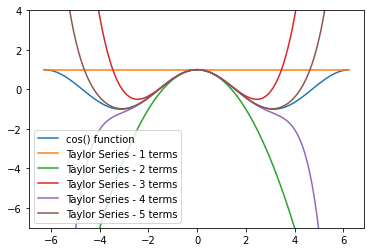

In [22]:
import math
import numpy as np
import matplotlib.pyplot as plt
# if using a Jupyter notebook, include:
%matplotlib inline

angles = np.arange(-2*np.pi,2*np.pi,0.1)
p_cos = np.cos(angles)

fig, ax = plt.subplots()
ax.plot(angles,p_cos)

# add lines for between 1 and 6 terms in the Taylor Series
for i in range(1,6):
    t_cos = [func_cos(angle,i) for angle in angles]
    ax.plot(angles,t_cos)

ax.set_ylim([-7,4])

# set up legend
legend_lst = ['cos() function']
for i in range(1,6):
    legend_lst.append(f'Taylor Series - {i} terms')
ax.legend(legend_lst, loc=3)

plt.show()

Vemos que la Serie Taylor con 5 términos (la línea marrón) se acerca más a la aproximación de la función cos() de Python. La Serie Taylor con 5 términos es una buena aproximación del coseno de los ángulos entre aproximadamente -π y π radianes. La Serie de Taylor con 5 términos es una peor aproximación para ángulos menores de -π o mayores que π. A medida que el ángulo se aleja de los radianes cero, la estimación del coseno utilizando una Serie de Taylor empeora cada vez más.

In [25]:
def imc(masa,estatura):
  imc=46.6111
  imc=masa/estatura**2
  return imc
print(imc(46,1.99))


11.61586828615439


#Taylor Series Expansion with Python

In [26]:
from sympy import series, Symbol
from sympy.functions import sin, cos, exp
from sympy.plotting import plot
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams['figure.figsize'] = 13,10
plt.rcParams['lines.linewidth'] = 2

In [27]:
# Define symbol
x = Symbol('x')

In [28]:
# Function for Taylor Series Expansion

def taylor(function, x0, n):
    """
    El parámetro "función" es nuestra función que queremos aproximar "x0" es el
     punto donde aproximar "n" es el orden de aproximación
    """
    return function.series(x,x0,n).removeO()

In [29]:
print('sin(x) =', taylor(sin(x), 0, 4))

print('cos(x) =', taylor(cos(x), 0, 4))

print('e(x) =', taylor(exp(x), 0, 4))

sin(x) = -x**3/6 + x
cos(x) = -x**2/2 + 1
e(x) = x**3/6 + x**2/2 + x + 1


Eso no es todo. Podemos evaluar estas funciones en cualquier momento. Por ejemplo, como hicimos anteriormente para x=1

In [30]:
print('sin(1) =', taylor(sin(x), 0, 4).subs(x,1))
print('cos(1) =', taylor(cos(x), 0, 4).subs(x,1))
print('e(1) =', taylor(exp(x), 0, 4).subs(x,1))

sin(1) = 5/6
cos(1) = 1/2
e(1) = 8/3


##Expansión de Taylor para Sine

/usr/local/lib/python3.6/dist-packages/sympy/plotting/plot.py:890: MatplotlibDeprecationWarning: 
The set_smart_bounds function was deprecated in Matplotlib 3.2 and will be removed two minor releases later.
  self.ax.spines['left'].set_smart_bounds(True)
/usr/local/lib/python3.6/dist-packages/sympy/plotting/plot.py:891: MatplotlibDeprecationWarning: 
The set_smart_bounds function was deprecated in Matplotlib 3.2 and will be removed two minor releases later.
  self.ax.spines['bottom'].set_smart_bounds(False)


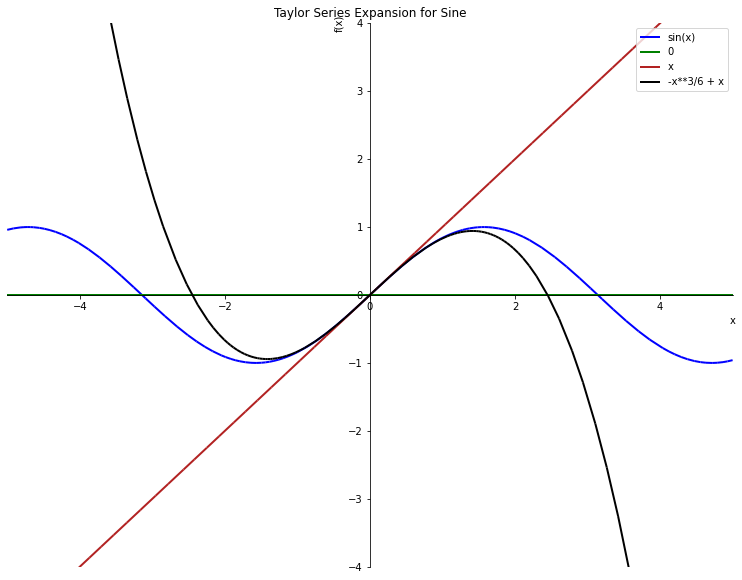

In [80]:
p = plot(sin(x),taylor(sin(x),0,1),taylor(sin(x),0,3),taylor(sin(x),0,5),
         (x,-5,5),legend=True, show=False,ylim=(-4,4))

p[0].line_color = 'blue'
p[1].line_color = 'green'
p[2].line_color = 'firebrick'
p[3].line_color = 'black'
p.title = 'Taylor Series Expansion for Sine'
p.show()

##Taylor Expansion for Cosine

/usr/local/lib/python3.6/dist-packages/sympy/plotting/plot.py:890: MatplotlibDeprecationWarning: 
The set_smart_bounds function was deprecated in Matplotlib 3.2 and will be removed two minor releases later.
  self.ax.spines['left'].set_smart_bounds(True)
/usr/local/lib/python3.6/dist-packages/sympy/plotting/plot.py:891: MatplotlibDeprecationWarning: 
The set_smart_bounds function was deprecated in Matplotlib 3.2 and will be removed two minor releases later.
  self.ax.spines['bottom'].set_smart_bounds(False)


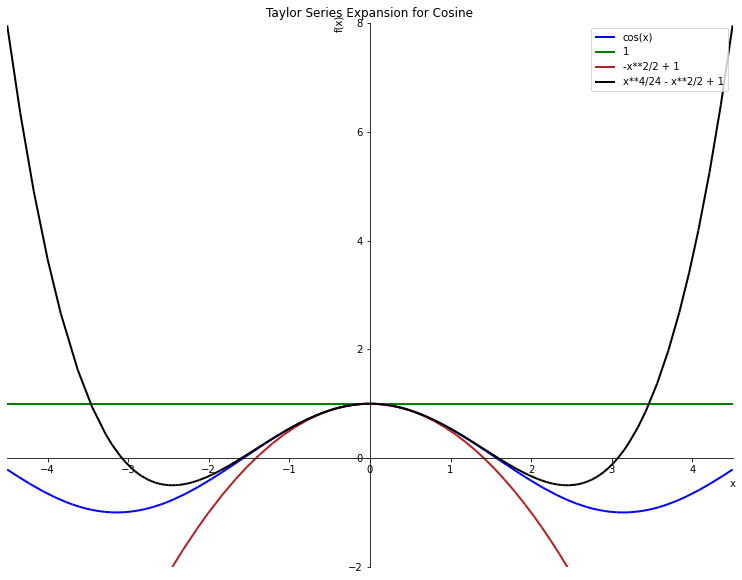

In [78]:
p = plot(cos(x),taylor(cos(x),0,2),taylor(cos(x),0,4),taylor(cos(x),0,6),
         (x,-4.5,4.5),legend=True, show=False, ylim=(-2,8))

p[0].line_color = 'blue'
p[1].line_color = 'green'
p[2].line_color = 'firebrick'
p[3].line_color = 'black'
p.title = 'Taylor Series Expansion for Cosine'
p.show()

##Taylor Expansion for Exponent

/usr/local/lib/python3.6/dist-packages/sympy/plotting/plot.py:890: MatplotlibDeprecationWarning: 
The set_smart_bounds function was deprecated in Matplotlib 3.2 and will be removed two minor releases later.
  self.ax.spines['left'].set_smart_bounds(True)
/usr/local/lib/python3.6/dist-packages/sympy/plotting/plot.py:891: MatplotlibDeprecationWarning: 
The set_smart_bounds function was deprecated in Matplotlib 3.2 and will be removed two minor releases later.
  self.ax.spines['bottom'].set_smart_bounds(False)


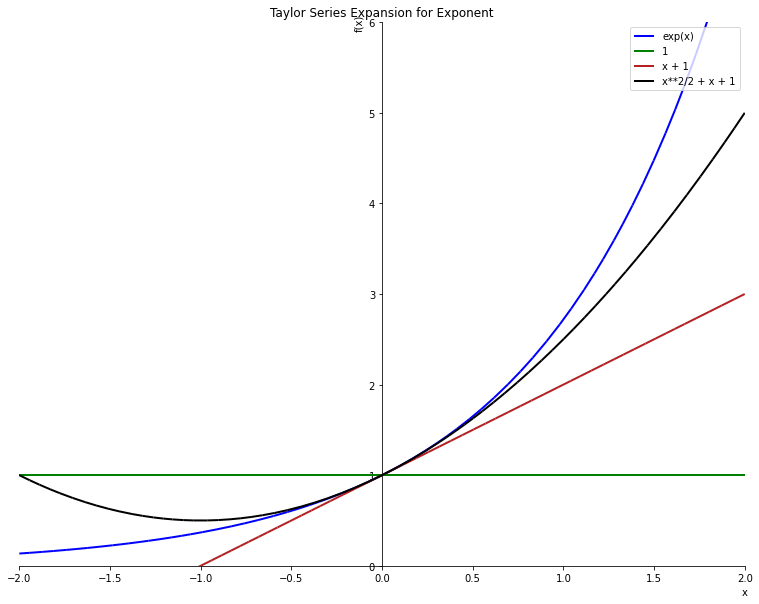

In [75]:
p = plot( exp(x),taylor(exp(x),0,1),taylor(exp(x),0,2),taylor(exp(x),0,3),
         (x,-2,2),legend=True, show=False, ylim=(0,6) )

p[0].line_color = 'blue'
p[1].line_color = 'green'
p[2].line_color = 'firebrick'
p[3].line_color = 'black'
p.title = 'Taylor Series Expansion for Exponent'
p.show()